In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [11]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [86]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [87]:
# Looking at columns in data
first_row_measurement = session.query(Measurement).first()
first_row_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1e4da2fcb80>,
 'prcp': 0.08,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0,
 'station': 'USC00519397'}

In [88]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement).order_by(Measurement.date.desc()).first()
recent_date.date


'2017-08-23'

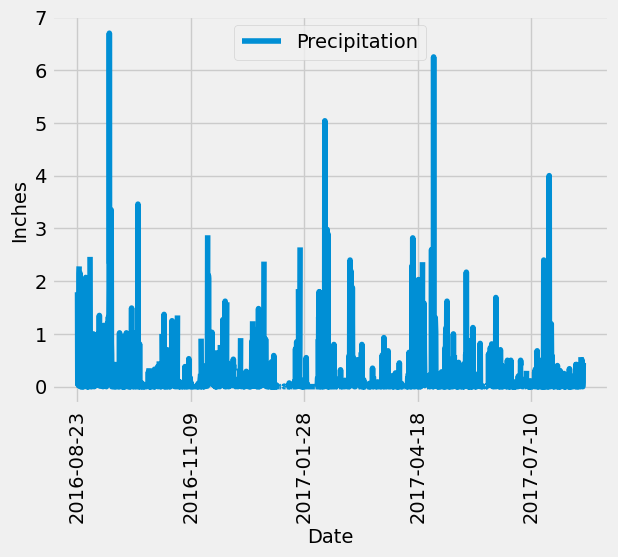

In [367]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
last_year_date = (dt.datetime.strptime(recent_date.date, '%Y-%m-%d') - dt.timedelta(days=365)).date()
# Perform a query to retrieve the data and precipitation scores
last12months_query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year_date).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
last12months_df = pd.DataFrame(last12months_query, columns=['Date', 'Precipitation'])
# Sort the dataframe by date
sorted_df = last12months_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
sorted_df.plot('Date', 'Precipitation')
plt.ylabel('Inches')
plt.xticks(rotation=90)
plt.show()

In [340]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [317]:
# Looking at columns in data
first_row_station = session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1e4f7e54820>,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0}

In [325]:
# Design a query to calculate the total number of stations in the dataset
#session.query(Station.station).count()
station_count = session.query(func.count(Station.station)).all()
station_count

[(9,)]

In [368]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations_query = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations_query

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [347]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_temps_analysis = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).group_by(Measurement.station).filter(Measurement.station == 'USC00519281').all()
most_active_station_temps_analysis

[(54.0, 85.0, 71.66378066378067)]

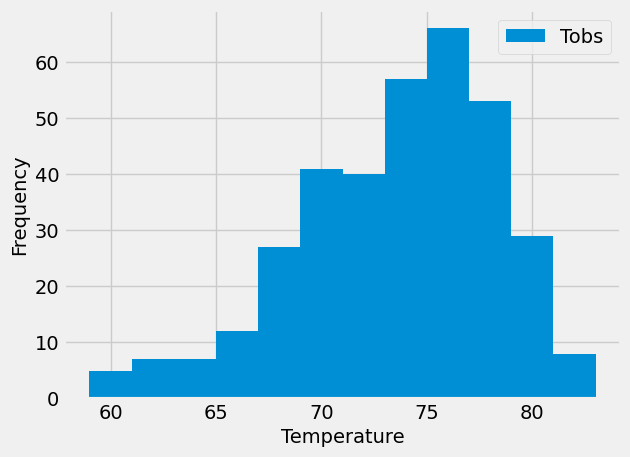

In [369]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station.
most_active_station_temps_query = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281', Measurement.date >= last_year_date).all()

# Plot the results as a histogram
most_active_station_temps_df = pd.DataFrame(most_active_station_temps_query, columns=['Tobs'])
most_active_station_temps_df.plot(kind='hist', bins=12)
plt.xlabel('Temperature')
plt.show()

# Close Session

In [370]:
# Close Session
session.close()